In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

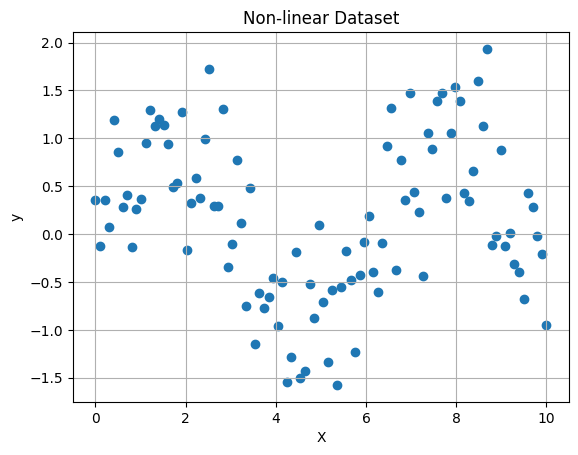

In [5]:
# Create sample data
def function(x):
    return np.sin(x) + np.random.randn(len(x)) * 0.5

x = np.linspace(0, 10, 100)
y = function(x)

# Plotting the dataset
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-linear Dataset')
plt.grid(True)

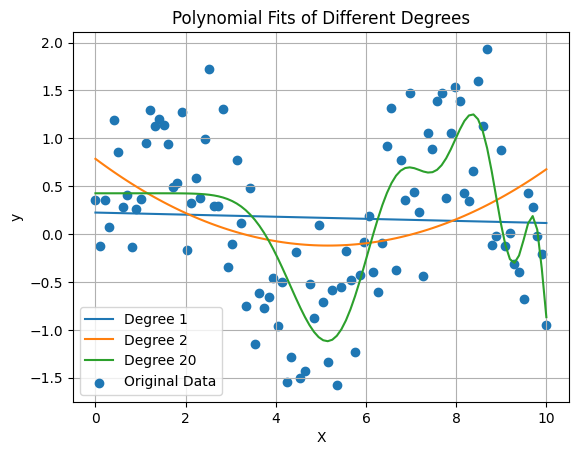

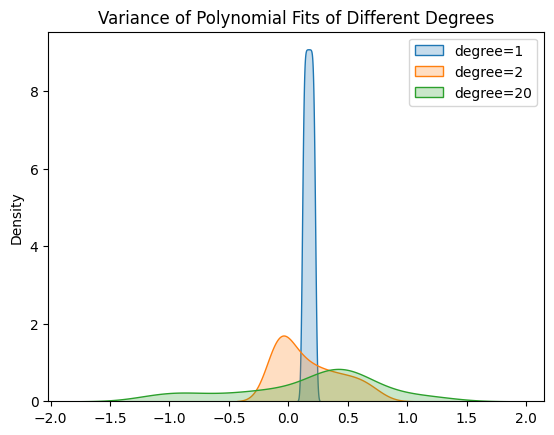

In [6]:
#@title Fitting different polynomial function
degrees = [1, 2, 20] # @param {type:"raw"}
y_predicted_lst = []

for degree in degrees:
  # Create polynomial features
  poly = PolynomialFeatures(degree=degree)

  # Reshape data
  poly_features = poly.fit_transform(x.reshape(-1, 1))

  # Fit model
  poly_reg_model = LinearRegression()
  poly_reg_model.fit(poly_features, y)

  # Predict
  y_predicted = poly_reg_model.predict(poly_features)
  y_predicted_lst.append(y_predicted)

  # Plot predictions for each degree with different colors
  label = f"Degree {degree}"
  plt.plot(x, y_predicted, label=label)

# Plot original data points
plt.scatter(x, y, label="Original Data")

# Labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Fits of Different Degrees')
plt.grid(True)
plt.legend()
plt.show()


for degree, y_predicted in zip(degrees, y_predicted_lst):
  # Create a KDE plot
  sns.kdeplot(y_predicted, label=f'degree={degree}',fill=True)

# Add legend and labels
plt.title('Variance of Polynomial Fits of Different Degrees')
plt.legend()
plt.show()